## 머신러닝
# 3. kNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',', usecols=range(4))
iris.shape

(150, 4)

### 거리 테스트

In [3]:
distances = ((iris.reshape(150,1,4)-iris)**2).sum(axis=2)**0.5
distances.shape

(150, 150)

In [4]:
sd = np.sort(distances, axis=1)
sd.shape

(150, 150)

In [5]:
sd[:5, :5]

array([[0.        , 0.1       , 0.14142136, 0.14142136, 0.14142136],
       [0.        , 0.14142136, 0.14142136, 0.17320508, 0.17320508],
       [0.        , 0.14142136, 0.24494897, 0.26457513, 0.26457513],
       [0.        , 0.14142136, 0.17320508, 0.2236068 , 0.24494897],
       [0.        , 0.14142136, 0.17320508, 0.17320508, 0.2236068 ]])

In [7]:
sd_idx = np.argsort(distances, axis=1)
sd_idx[:6, :6]

array([[ 0, 17,  4, 39, 27, 28],
       [ 1, 45, 12,  9, 34, 37],
       [ 2, 47,  3,  6, 12, 45],
       [ 3, 47, 29, 30,  2, 12],
       [ 4,  0, 17, 40,  7, 39],
       [ 5, 18, 10, 48, 44, 46]], dtype=int64)

### 목표값 지정
- 분류 문제이므로 목표값을 0,1,2 와 같이 지정해야 한다
- setosa 는 0, versicolor 는 1, virginica 는 2 로 놓자

In [4]:
X = iris
X.shape

(150, 4)

In [5]:
y = np.array([0]*50 + [1]*50 + [2]*50)
y.shape

(150,)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### sklean 의 KNeighborsClassifier 모델 적용
- fit()
- predict()
- score()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
pred_y = knn.predict(X)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
knn.predict([[0,0,0,0]])

array([0])

In [13]:
145/150

0.9666666666666667

In [16]:
knn.score(X, y)

0.9666666666666667

In [18]:
### 점수를 직접 구할 수 있다
(pred_y == y).mean() # True: 1, False: 0

0.9666666666666667

In [20]:
### 잘 못 판단한 샘플의 인덱스 번호를 구해보자
idx = np.where(pred_y!=y)[0]
idx

array([ 70,  72,  83, 106, 119], dtype=int64)

In [21]:
display(y[idx], pred_y[idx])

array([1, 1, 1, 2, 2])

array([2, 2, 2, 1, 1])

### k 값을 바꾸면 결과가 달라진다
- k=1
- k=3
- k=7
- k=150?

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.score(X, y)

1.0

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.score(X, y)

0.96

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn.score(X, y)

0.9666666666666667

In [25]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
knn.score(X, y)

0.9733333333333334

In [26]:
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(X, y)
knn.score(X, y)

0.3333333333333333

> - k=1 이면 가장 가까운 샘플 하나만 고려한다 (자기 자신은 자기 자신이다)
> - k=150 이면 모든 샘플을 다 고려하므로, 가장 숫자가 많은 클래스로 판별한다

### 학습 데이터와 테스트 데이터 분리
- 머신러닝은 미래를 예측하려는 기술이다
- 아무리 현재 데이터에 잘 맞더라도 예측을 잘 하지 못하면 쓸모없는 모델이 된다 (k=1 일 때를 생각해 보자)
- 미래 데이터는 없으므로, 현재 데이터 중 일부를 테스트 용도로 빼 놓는다

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [32]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [38]:
### 학습데이터 75%, 테스트데이터 25%
### 각각의 데이터는 랜덤하게 선택된다
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
knn.score(X_train, y_train)

0.9553571428571429

In [43]:
knn.score(X_test, y_test) # 학습/테스트 샘플을 뽑을 때마다 점수가 달라진다

1.0

### 시각화를 위해 속성 2개로 제한
- 속성이 2개여야 산점도를 그리고 결과를 시각화할 수 있다
- 속성이 2개를 넘어가면 현실적으로 시각화가 불가능하다

In [5]:
X = iris.data[:,:2] # sepal length, sepal width
y = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

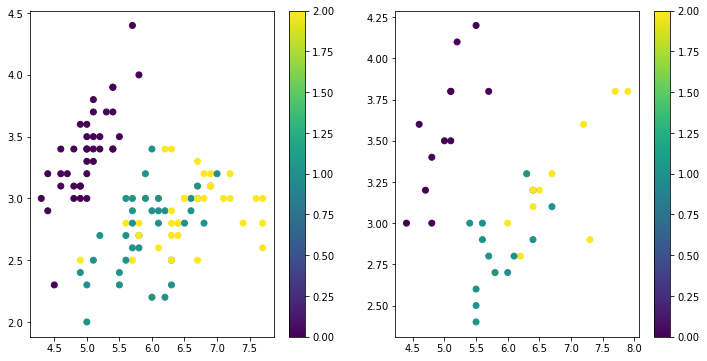

In [61]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.colorbar()

- 교재의 시각화 라이브러리 설치
> pip install mglearn

In [53]:
! pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=4fe8441e2700d9c14374c668a6cdf63fb88f0311119bf3bce2d47a409889465e
  Stored in directory: c:\users\gubos\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
import mglearn

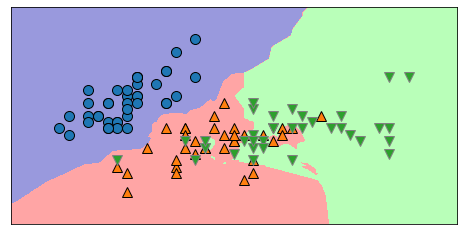

In [9]:
plt.figure(figsize=[8,4])
mglearn.plots.plot_2d_classification(knn, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

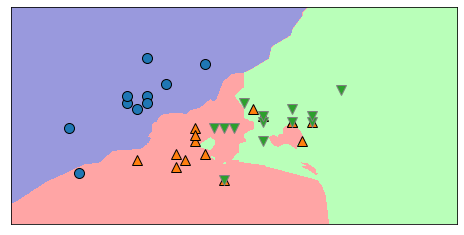

In [10]:
plt.figure(figsize=[8,4])
mglearn.plots.plot_2d_classification(knn, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

In [11]:
help(mglearn.plots.plot_2d_classification)

Help on function plot_2d_classification in module mglearn.plot_2d_separator:

plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1, cm=<matplotlib.colors.ListedColormap object at 0x0000019A7D1E0520>)



### k-NN 의 특징
- k 값이 커질 수록 결정경계가 부드러워진다. 왜 그럴까?
- k 가 작으면 **과대적합**, k 가 크면 **과소적합** 인 경향을 보인다.
- 위의 예제에서, fit() 함수를 호출할 때 사실은 훈련데이터를 읽어오는 일만 하고 복잡한 작업을 거의 하지 않는다. 즉 모델을 훈련시키는 부하는 거의 없다. => **장점**
- 하지만 한 점을 예측하려고 하면, 모든 훈련데이터의 점들과 거리를 비교해야 한다. 이것은 상당히 부하가 많이 발생하는 일이므로 예측할 때 많은 시간이 소요될 수 있다. => **단점**
- k-NN 에서는 동점이 나오는 경우가 생긴다. 이럴 경우 알고리즘 내부적으로 판단한다.
- 아래에서 k 값이 변할 때, 훈련세트와 테스트세트에서 점수가 어떻게 변하는 지를 보여준다.

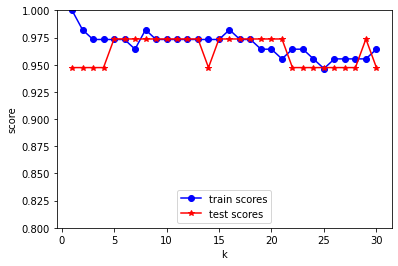

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

train_scores = []
test_scores = []

for k in range(1,31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    score1 = model.score(X_train, y_train)
    score2 = model.score(X_test, y_test)
    
    train_scores.append(score1)
    test_scores.append(score2)
    
plt.plot(range(1,31),train_scores,'bo-',label='train scores')
plt.plot(range(1,31),test_scores,'r*-',label='test scores')
plt.ylim(0.8,1.)
plt.xlabel('k')
plt.ylabel('score')
plt.legend(loc='lower center')